In [1]:
import torch
from fastai.vision.all import *
import re

In [2]:
import os,sys,inspect
sys.path.insert(0, '..')
sys.path.insert(0, '../..') 

In [3]:
from lib.modules.matcher import HungarianMatcher
from lib.modules.parallel import *
from lib.modules.sequential import *
from lib.modules.single_classifier import SingleClassifier
from lib.modules.matcher import HungarianMatcher
from lib.modules.parallel import *
from lib.modules.sequential import *
from lib.modules.single_classifier import SingleClassifier
from lib.label import label_field
from lib.label import *
from lib.metric import *
from lib.data import *
from lib.loss import *
from lib.loader import *
from common.image import toTensor
from common.model import savePkl, loadPkl
from common.classes import indicesToClass

In [4]:
data = load_data(84, (480, 480), 'train', 'valid', max_rotate=0.0, exclude=[], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-10x-4')

/home/kevin/miniconda3/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


torch.Size([3, 480, 480]) torch.Size([3, 480, 480])
18-1
3-1
8-1


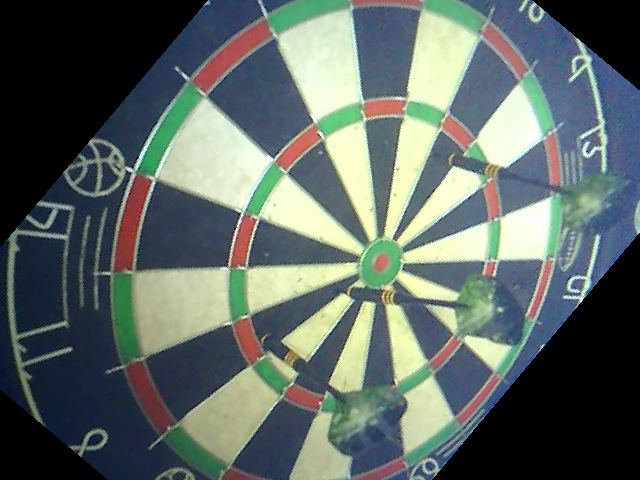

In [11]:
model = learn.model.eval()
img1 = Image.open('/home/kevin/Projekte/DartNet/finder/img/2021-10-16-08-18-31/36-0.jpg').rotate(-130)
img2 = Image.open('/home/kevin/Projekte/DartNet/finder/img/2021-10-16-08-18-31/36-1.jpg').rotate(110)
t1 = toTensor(img1)
t2 = toTensor(img2)
print(t1.shape, t2.shape)
darts = torch.zeros([1,25])
encoding = model.encoder(torch.stack((t1,t2))).sum(0, True)
for i in range(0,3):
    joined = torch.cat((encoding, darts), -1)
    output = model.head(joined)
    index = [output[0, 0:20].argmax(dim=-1), output[0, 20:].argmax(dim=-1)]
    print(indicesToClass(index))
    darts[0, index] += 1
img1